In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

terror = "Terrorism.csv"
df = pd.read_csv(terror, encoding = "Latin")


df2 = df[["iyear","imonth", "country_txt", "region_txt", "city", "attacktype1_txt", "targtype1_txt","nkill","nwound"]]


renamed_df = df2.rename(columns={"iyear": "Year","imonth": "Month", "country_txt": "Country", 
                "region_txt":"Region", "city":"City", "attacktype1_txt": "Attack Type",
                "targtype1_txt":"Target_Type","nkill":"Number Killed","nwound":"Number Wounded"})
renamed_df['Year'] = renamed_df['Year'].astype(str)
renamed_df['Month'] = renamed_df['Month'].astype(str)
renamed_df.dtypes

C:\Users\khyman003\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (61,63,79,114,115) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Year               object
Month              object
Country            object
Region             object
City               object
Attack Type        object
Target_Type        object
Number Killed     float64
Number Wounded    float64
dtype: object

In [25]:
terror = renamed_df.groupby(["Region"]).count()
terroryear = terror.groupby(["Year"])
terroryear.head()


,Year,Month,Country,City,Attack Type,Target_Type,Number Killed,Number Wounded
Region,,,,,,,,
Australasia & Oceania,46,46,46,46,46,46,46,45
Central America & Caribbean,28,28,28,28,28,28,28,27
Central Asia,62,62,62,62,62,62,62,62
East Asia,105,105,105,105,105,105,100,98
Eastern Europe,2228,2228,2228,2228,2228,2228,2128,2098
Middle East & North Africa,29839,29839,29839,29839,29839,29839,28360,27541
North America,342,342,342,342,342,342,342,342
South America,1105,1105,1105,1105,1105,1105,1091,1084
South Asia,25067,25067,25067,25067,25067,25067,24362,23914


In [55]:
#Break up dataframes by year
FY2012DF  = renamed_df.loc[renamed_df["Year"] == "2012", :]
FY2013DF  = renamed_df.loc[renamed_df["Year"] == "2013", :]
FY2014DF  = renamed_df.loc[renamed_df["Year"] == "2014", :]
FY2015DF  = renamed_df.loc[renamed_df["Year"] == "2015", :]
FY2016DF  = renamed_df.loc[renamed_df["Year"] == "2016", :]
FY2017DF  = renamed_df.loc[renamed_df["Year"] == "2017", :]


#Group by region and count how many attacks that year
Region2012 = FY2012DF.groupby(["Region"]).count()
Region2013 = FY2013DF.groupby(["Region"]).count()
Region2014 = FY2014DF.groupby(["Region"]).count()
Region2015 = FY2015DF.groupby(["Region"]).count()
Region2016 = FY2016DF.groupby(["Region"]).count()
Region2017 = FY2017DF.groupby(["Region"]).count()


#pull out one column count to plot.
Chart2012 = Region2012[["Year"]]
Chart2013 = Region2013[["Year"]]
Chart2014 = Region2014[["Year"]]
Chart2015 = Region2015[["Year"]]
Chart2016 = Region2016[["Year"]]
Chart2017 = Region2017[["Year"]]

Combined = pd.merge(Chart2012, Chart2013, on="Region")
CombinedRename = Combined.rename(columns = {"Year_x": "2012", "Year_y": "2013"})

Combined2 = pd.merge(CombinedRename, Chart2014, on="Region")
Combined2Rename = Combined2.rename(columns = {"Year":"2014"})

Combined3 = pd.merge(Combined2Rename, Chart2015, on="Region")
Combined3Rename = Combined3.rename(columns = {"Year":"2015"})
Combined3Rename.head(10)

,2012,2013,2014,2015
Region,,,,
Central America & Caribbean,1,14,5,1
Central Asia,12,7,9,10
East Asia,4,15,43,28
Eastern Europe,173,165,962,684
Middle East & North Africa,2409,4560,6939,6036
North America,39,32,37,62
South America,133,182,283,176
South Asia,3803,4612,4998,4585
Southeast Asia,587,1188,1082,1072


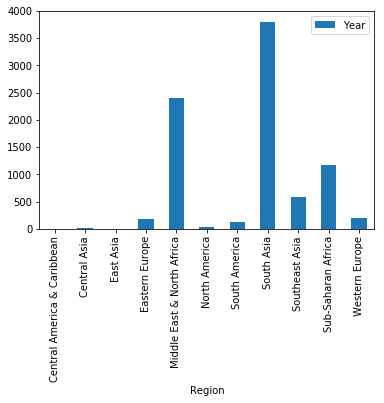

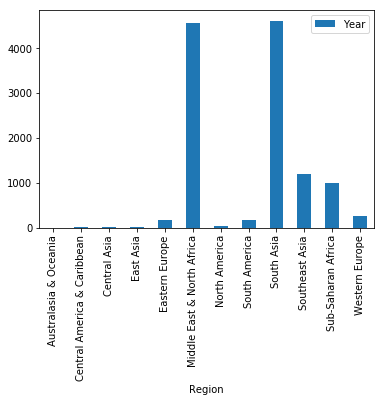

In [59]:
#plot lines

#xaxis = Chart2012.keys()

Bar2012 = Chart2012.plot(kind='bar')
Bar2013 = Chart2013.plot(kind='bar')


# Set the xlabel and ylabel using class methods
Bar.set_xlabel("Region")
Bar.set_ylabel("Count")


plt.show()